Importação da Bibliotecas iniciais

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

Examinando os dados

https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo

In [35]:
dados = pd.read_csv('../data/Consumo_cerveja.csv', sep=';')

In [36]:
dados.head()

,data,temperatura_media,temperatura_minima,temperatura_maxima,precipitacao,fds,consumo_litros
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


Distribuição de dados (tupla: linhas e colunas)

In [37]:
dados.shape

(365, 7)

Estatística descritiva

In [38]:
dados.describe().round(2) # round(2) arredonda para 2 casas decimais

,temperatura_media,temperatura_minima,temperatura_maxima,precipitacao,fds,consumo_litros
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


Coeficiente de correlação de Pearson

Uma medida de correlação linear entre duas variáveis X e Y que assume valores entre -1 e 1;

In [39]:
# converte a coluna data de string para o formato datetime
dados['data'] = pd.to_datetime(dados['data'], format='%d/%m/%Y')
dados.corr(method='pearson').round(4)
# +1 indica correlação positiva perfeita
# -1 indica correlação negativa perfeita

,data,temperatura_media,temperatura_minima,temperatura_maxima,precipitacao,fds,consumo_litros
data,1.0000,-0.0986,-0.1701,-0.0689,0.0075,-0.0060,0.0435
temperatura_media,-0.0986,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temperatura_minima,-0.1701,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temperatura_maxima,-0.0689,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
precipitacao,0.0075,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0060,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo_litros,0.0435,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


Variável Dependente (Y)

Onde Y é uma série temporal (coletada diariamente)

Plotar a variável dependente

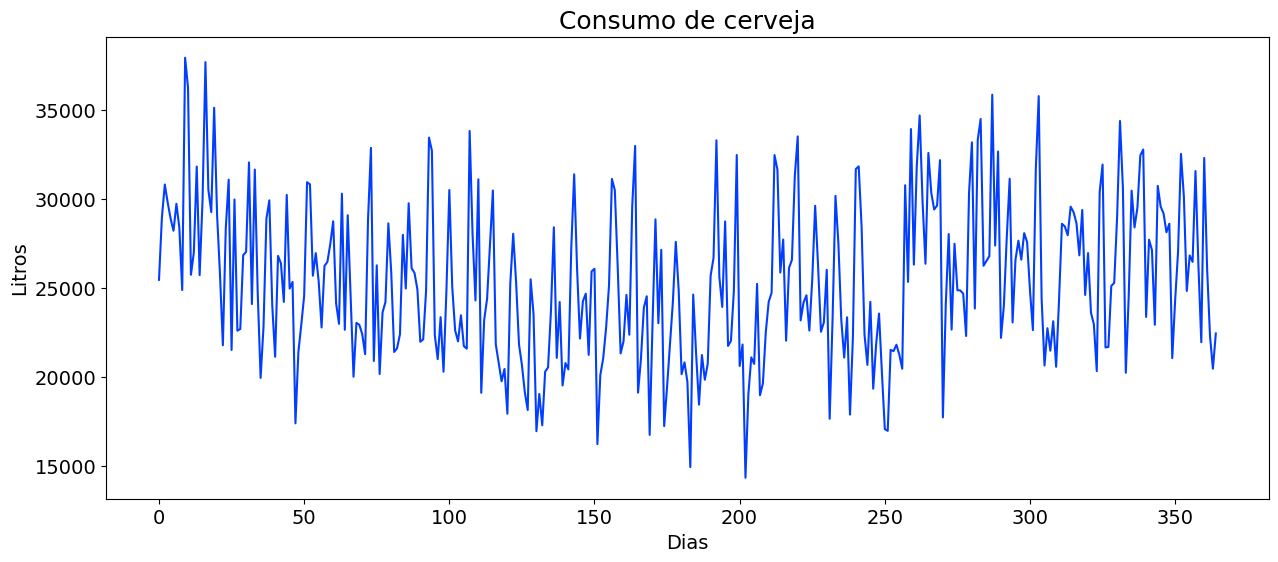

In [40]:
fig, ax = plt.subplots(figsize=(15, 6)) # desempacota a tupla em fig e ax | gerar figura

ax.set_title('Consumo de cerveja', fontsize=18) # define o título do gráfico
ax.set_ylabel('Litros', fontsize=14) # define o label do eixo y
ax.set_xlabel('Dias', fontsize=14) # define o label do eixo x
ax = dados['consumo_litros'].plot(fontsize=14) # atribui aos eixos ax valores de consumo_litros

O Boxplot é um diagrama de caixa construído utilizando as referências: centro dos dados (a média ou mediana), a amplitude dos dados (máximo – mínimo), a simetria ou assimetria do conjunto de dados e a presença de outliers.

https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Consumo de cerveja'}, ylabel='Litros'>

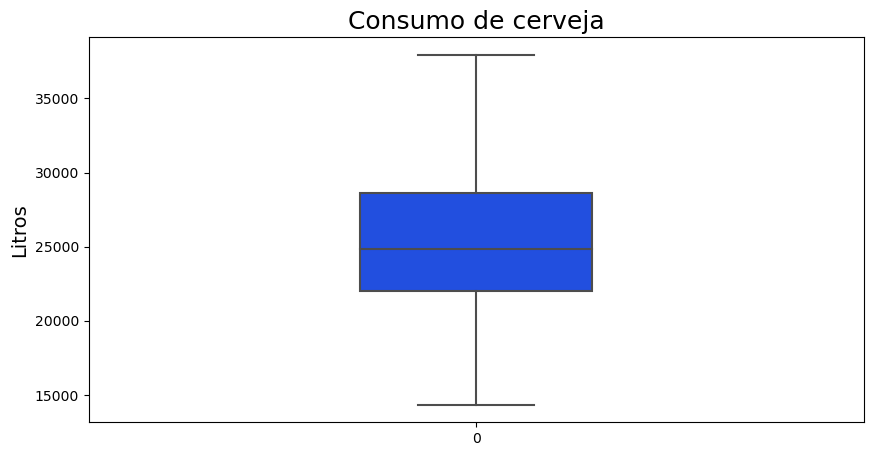

In [41]:
import seaborn as sns

ax = sns.boxplot(data=dados['consumo_litros'], width=0.3)
ax.figure.set_size_inches(10, 5) # define o tamanho da figura
ax.set_title('Consumo de cerveja', fontsize=18) # define o título do gráfico
ax.set_ylabel('Litros', fontsize=14) # define o label do eixo y
ax

In [42]:
sns.set_palette('bright') # define a paleta de cores
sns.color_palette('bright') # exibe a paleta de cores

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

<Axes: title={'center': 'Consumo de cerveja'}, xlabel='Final de semana', ylabel='Litros'>

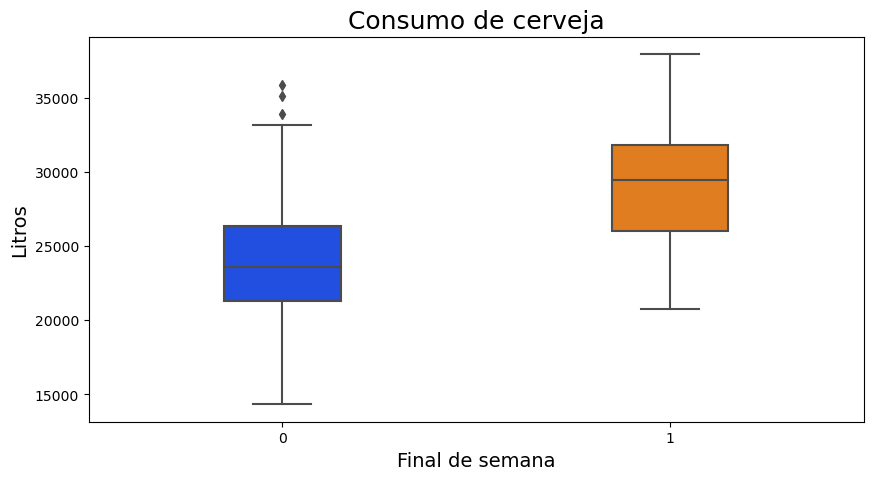

In [43]:
ax = sns.boxplot(y='consumo_litros', x='fds', data=dados, width=0.3)
ax.figure.set_size_inches(10, 5) # define o tamanho da figura
ax.set_title('Consumo de cerveja', fontsize=18) # define o título do gráfico
ax.set_ylabel('Litros', fontsize=14) # define o label do eixo y
ax.set_xlabel('Final de semana', fontsize=14) # define o label do eixo x
ax

Curva Normal (Sino)

https://www.bing.com/images/search?q=curva+normal

Os métodos estatísticos mais conhecidos supõem que a variável dependente segue a distribuição normal. Uma forma preliminar de se averiguar a hipótese de normalidade da variável dependente é através do histograma

https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot

Eixo x (horizontal): No eixo horizontal do histograma, você encontrará os valores da variável dependente. Esses valores são divididos em intervalos chamados "bins" ou classes. Cada bin representa um intervalo de valores da variável.

Eixo y (vertical): No eixo vertical, você verá a frequência ou contagem de observações que caem em cada bin. Em outras palavras, o eixo y mostra quantas vezes os valores da variável dependente ocorreram dentro de cada intervalo.

<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Consumo', ylabel='Consumo de cerveja (L)'>

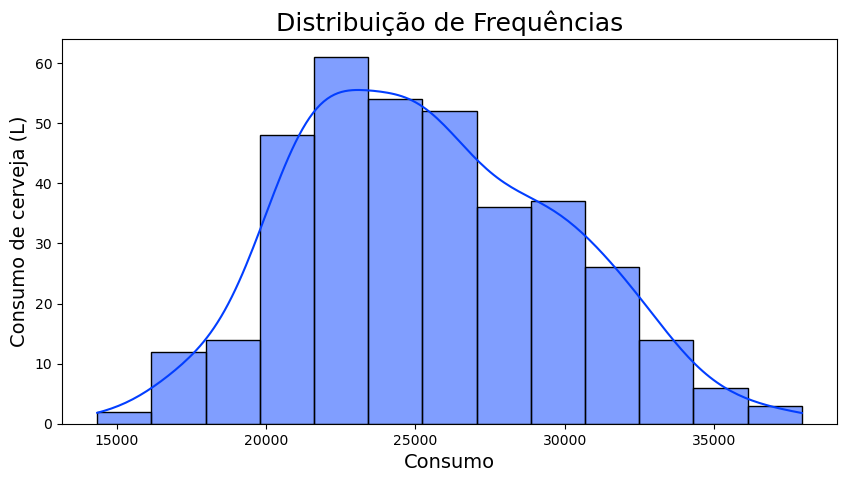

In [44]:
ax = sns.histplot(data=dados['consumo_litros'],kde=True)
ax.figure.set_size_inches(10, 5) # define o tamanho da figura
ax.set_title('Distribuição de Frequências', fontsize=18) # define o título do gráfico
ax.set_ylabel('Consumo de cerveja (L)', fontsize=14) # define o label do eixo y
ax.set_xlabel('Consumo', fontsize=14) # define o label do eixo x
ax

Relação Linear da Variável Dependente (Y) x Variáveis explicativas

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

In [45]:
variaveis = dados.drop(columns=['data', 'consumo_litros'])
variaveis.columns.tolist()

['temperatura_media',
 'temperatura_minima',
 'temperatura_maxima',
 'precipitacao',
 'fds']

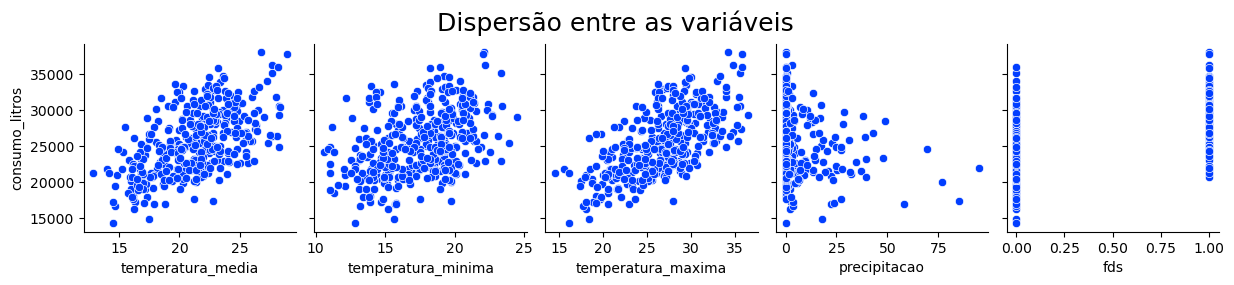

In [46]:
ax =  sns.pairplot(
    dados, 
    y_vars='consumo_litros', 
    x_vars=variaveis.columns.tolist(), 
    kind='scatter')

ax.fig.suptitle('Dispersão entre as variáveis', fontsize=18, y=1.1)
ax

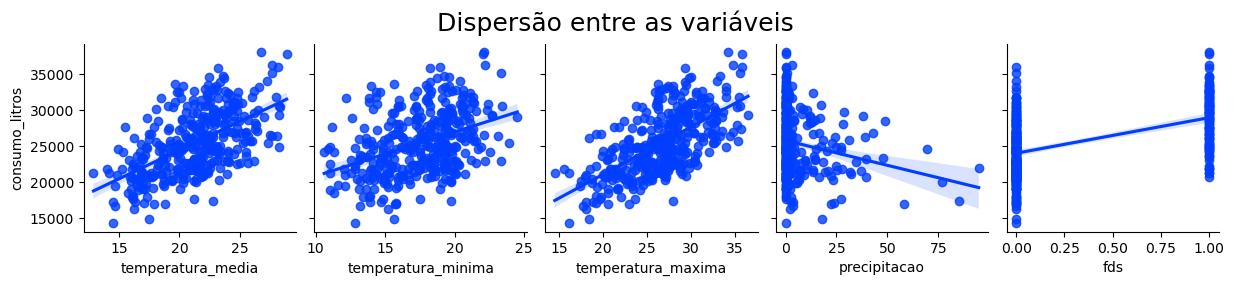

In [47]:
ax =  sns.pairplot(
    dados, 
    y_vars='consumo_litros', 
    x_vars=variaveis.columns.tolist(), 
    kind='reg')

ax.fig.suptitle('Dispersão entre as variáveis', fontsize=18, y=1.1)
ax

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

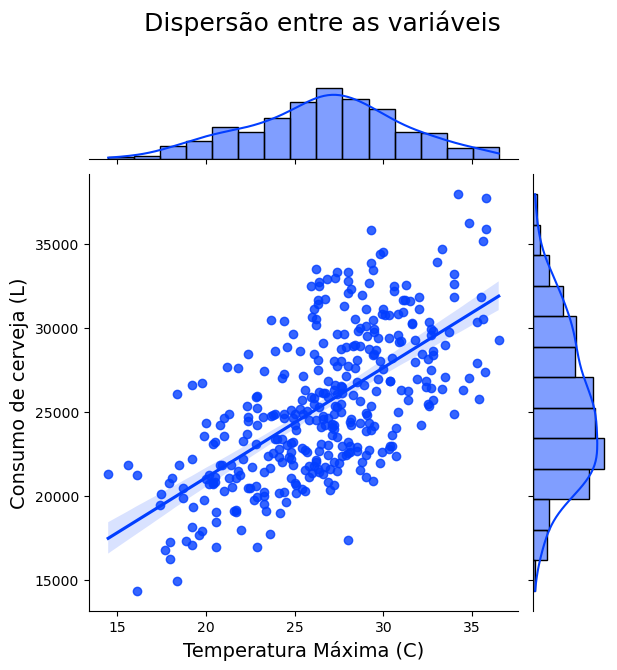

In [48]:
ax = sns.jointplot(x='temperatura_maxima', y='consumo_litros', data=dados, kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=18, y=1.1)
ax.set_axis_labels('Temperatura Máxima (C)', 'Consumo de cerveja (L)', fontsize=14) # define os labels dos eixos x e y
ax

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

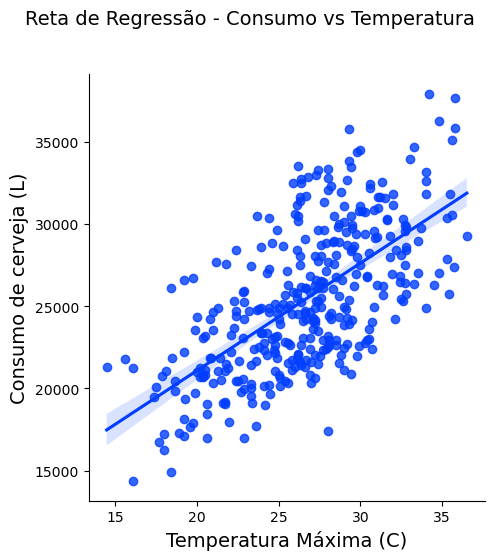

In [49]:
ax = sns.lmplot(x='temperatura_maxima', y='consumo_litros', data=dados)
ax.fig.suptitle('Reta de Regressão - Consumo vs Temperatura', fontsize=14, y=1.1)
ax.set_axis_labels('Temperatura Máxima (C)', 'Consumo de cerveja (L)', fontsize=14) # define os labels dos eixos x e y
ax 

Relação Linear da Variável Dependente (Y) x Temperatura, terceira variável na análise

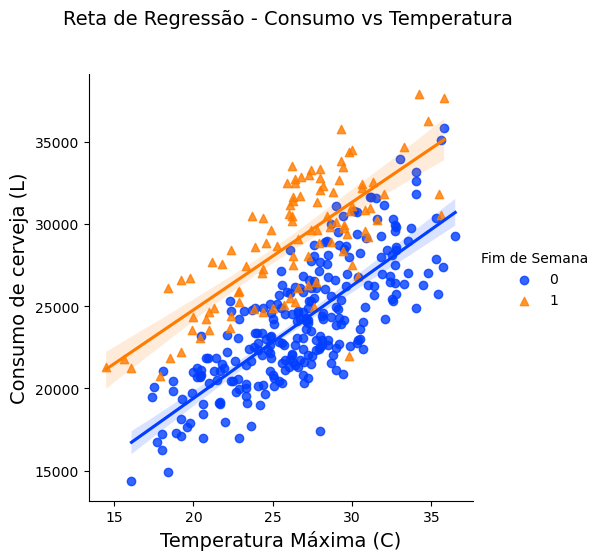

In [51]:
ax = sns.lmplot(
    x='temperatura_maxima', 
    y='consumo_litros', 
    data=dados,
    hue='fds',
    markers=['o', '^'],
    legend=False)
ax.fig.suptitle('Reta de Regressão - Consumo vs Temperatura', fontsize=14, y=1.1)
ax.set_axis_labels('Temperatura Máxima (C)', 'Consumo de cerveja (L)', fontsize=14) # define os labels dos eixos x e y
ax.add_legend(title='Fim de Semana') # adiciona a legenda ao gráfico
ax 

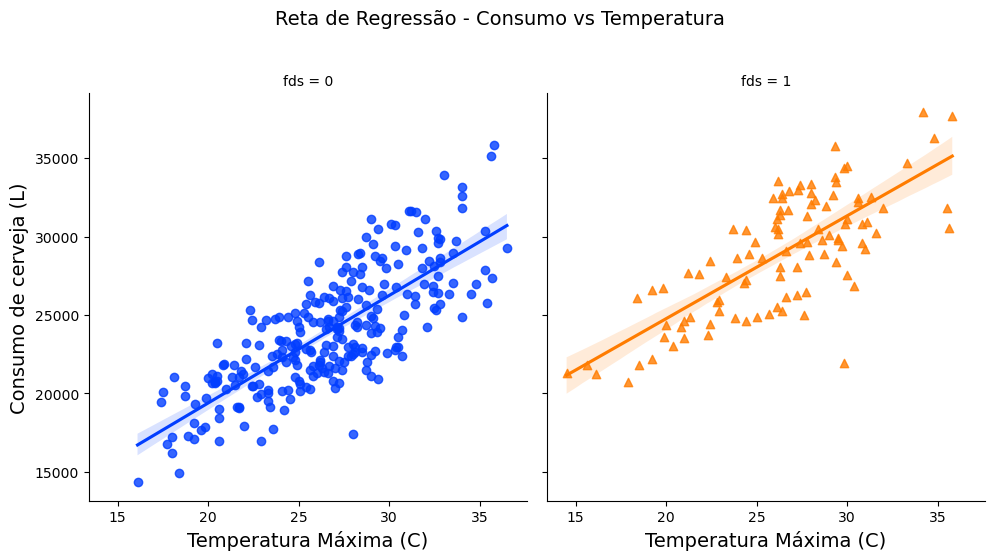

In [56]:
ax = sns.lmplot(
    x='temperatura_maxima', 
    y='consumo_litros', 
    data=dados,
    hue='fds',
    markers=['o', '^'],
    col='fds')
ax.fig.suptitle('Reta de Regressão - Consumo vs Temperatura', fontsize=14, y=1.1)
ax.set_axis_labels('Temperatura Máxima (C)', 'Consumo de cerveja (L)', fontsize=14) # define os labels dos eixos x e y
ax 

**O que é Regressão Linear?**

A Regressão Linear é um método fundamental em machine learning que nos ajuda a entender e prever relacionamentos entre variáveis. É uma técnica utilizada para encontrar uma linha reta (ou plano em casos de Regressão Linear Multivariada) que melhor representa a relação entre uma variável de entrada (ou mais, no caso multivariado) e uma variável de saída.

**Como funciona a Regressão Linear?**

Imagine que temos um conjunto de dados com duas variáveis, X e Y. Queremos descobrir se há uma relação linear entre essas variáveis e, se houver, podemos usar essa relação para fazer previsões. A ideia é encontrar a "melhor" linha reta que se ajusta aos nossos dados.

A linha reta é representada por uma equação na forma:

\[ Y = aX + b \]

Onde:
- **Y** é a variável de saída (a que queremos prever).
- **X** é a variável de entrada (a que usamos para prever Y).
- **a** é o coeficiente angular da linha (inclinação).
- **b** é o intercepto da linha (onde ela cruza o eixo Y quando X é igual a zero).

**Como encontramos os coeficientes (a e b)?**

Aqui entra a parte de "treinar" nosso modelo de Regressão Linear. Usamos um algoritmo para encontrar os valores de **a** e **b** que minimizam a diferença entre os valores previstos pela nossa linha e os valores reais do conjunto de dados. Isso é feito ajustando a linha de forma que ela esteja o mais próxima possível dos pontos de dados reais.

**Para que serve a Regressão Linear?**

A Regressão Linear é usada principalmente para dois propósitos:

1. **Modelagem:** Podemos usar a Regressão Linear para entender a relação entre variáveis. Por exemplo, se estamos estudando o efeito do tempo de estudo no desempenho dos alunos, a Regressão Linear pode nos ajudar a quantificar essa relação.

2. **Previsão:** Uma vez que temos uma linha que representa a relação entre as variáveis, podemos usá-la para fazer previsões. Se sabemos o valor de X, podemos prever o valor de Y.

**Resumindo:**

A Regressão Linear é uma técnica fundamental em machine learning que nos permite encontrar uma relação linear entre variáveis. Ela é usada para modelagem e previsão. A ideia é encontrar uma linha reta que melhor se ajusta aos dados, representada pela equação \( Y = aX + b \), onde \( a \) e \( b \) são coeficientes que são ajustados automaticamente durante o treinamento do modelo.

BIBLIOTECA Scikit-Learn

sklearn, é uma das bibliotecas de machine learning mais populares e amplamente usadas na linguagem de programação Python. Essa biblioteca oferece uma ampla variedade de ferramentas e funcionalidades para realizar tarefas de aprendizado de máquina, incluindo classificação, regressão, clusterização, redução de dimensionalidade, seleção de recursos e muito mais.

https://scikit-learn.org/stable/user_guide.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [57]:
from sklearn.model_selection import train_test_split

Criar Series (pandas) para o Consumo de Cerveja => y

In [58]:
y = dados['consumo_litros']

Criar DataFrame (pandas) para as variáveis explicativas => X

In [60]:
X = dados[['temperatura_maxima', 'precipitacao', 'fds']]

Separar o Dataset em conjuntos de Treino e Teste

desempacota a tupla em 4 variáveis e define o tamanho do teste em 30%

In [63]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
print(
    X_treino.shape, 
    X_teste.shape, 
    y_treino.shape, 
    y_teste.shape, 
    (X_treino.shape[0] + X_teste.shape[0])
)

(255, 3) (110, 3) (255,) (110,) 365


Importar ferramentas para Regressão Linear do Scikit-Learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [72]:
from sklearn.linear_model import LinearRegression

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [73]:
from sklearn import metrics

Instanciar a classe do LinearRegression

In [74]:
modelo = LinearRegression()

In [75]:
modelo.fit(X_treino, y_treino) # treina o modelo

LinearRegression()

Coeficiente de Determinação - R²

Assume valores de 0 a 1

Imagine que temos um modelo de regressão que tenta prever valores de saída com base em valores de entrada. O R² mede a proporção da variabilidade nos valores de saída que é explicada pelo modelo.

Em termos simples, quanto mais próximo o R² estiver de 1, melhor o modelo está em fazer previsões precisas. Quanto mais próximo de 0, pior o modelo está em explicar a variabilidade nos dados.

In [80]:
rDois = modelo.score(X_treino, y_treino).round(2) # calcula o R² do modelo

print(
    'R² = {}'.format(rDois)
)

R² = 0.71


Gerar Previsões com o modelo treinado de Machine Learning => LinearRegression

In [81]:
y_pred = modelo.predict(X_teste) # realiza a previsão

Coeficiente de Determinação - R² com ferramenta metrics

calcula o R² do modelo de teste (dados não utilizados no treinamento)

In [83]:
rDoisTeste = metrics.r2_score(y_teste, y_pred).round(2)

print(
    'R² = %s' % rDoisTeste
)

R² = 0.75


**ATENÇÃO o valor de R² NÃO é o quanto/% que o modelo está acertando/errando pois este modelo é de Regressão, isto é, não classifica nenhum valor. Em regressão é o quanto da variação foi explicada pela variáveis explicativas**

Aplicabilidade do Modelo

In [86]:
entrada = X_teste[0:1] # visualiza a primeira linha do dataset de teste
entrada

,temperatura_maxima,precipitacao,fds
193,28.7,0.0,0


In [100]:
print(
    'Previsão: {}'.format(modelo.predict(entrada)[0].round(2)),
) # realiza a previsão para a primeira linha do dataset de teste

Previsão: 25554.14


In [101]:
entradaSimulada = {
    'temperatura_maxima': [18.5],
    'precipitacao': [12.1],
    'fds': [1]
}

entradaSimulada = pd.DataFrame(entradaSimulada)
entradaSimulada

,temperatura_maxima,precipitacao,fds
0,18.5,12.1,1


In [102]:
print(
    'Previsão: {0:.2f}'.format(modelo.predict(entradaSimulada)[0]) # realiza a previsão para a entrada simulada
)

Previsão: 23438.37


In [105]:
modelo.intercept_ # coeficiente linear (Intercepto)

6396.174228697255

In [106]:
modelo.coef_ # coeficientes angulares

array([ 667.524992  ,  -53.05718063, 5334.97184259])

In [110]:
cabecalho = ['Intercepto', 'Temperatura Máxima', 'Precipitação', 'Final de Semana']

pd.DataFrame(
    data=np.append(modelo.intercept_, modelo.coef_), 
    index=cabecalho,
    columns=['Parâmetros']
)

,Parâmetros
Intercepto,6396.174229
Temperatura Máxima,667.524992
Precipitação,-53.057181
Final de Semana,5334.971843


**Intercepto:**

Excluindo a ação das variáveis explicativas, o efeito médio no Consumo é de...

**Temperatura Máxima:**

Com Precipitação e Final de Semana constantes, para cada +1°C gera uma variação média no Consumo de...

**Precipitação:**

Com Temp. Max. e Final de Semana constantes, para cada +1mm gera uma variação média no Consumo de...

**Final de Semana:**

Com Temp. Max. e Precipitação constantes, o fato de ser Final de Semana gera uma variação média no Consumo de...

**VALIDAÇÃO DO MODELO**

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [111]:
y_pred_treino = modelo.predict(X_treino) # realiza a previsão para o dataset de treino

<Axes: title={'center': 'Previsão x Real'}, xlabel='Litros - Real', ylabel='Litros - Previsão'>

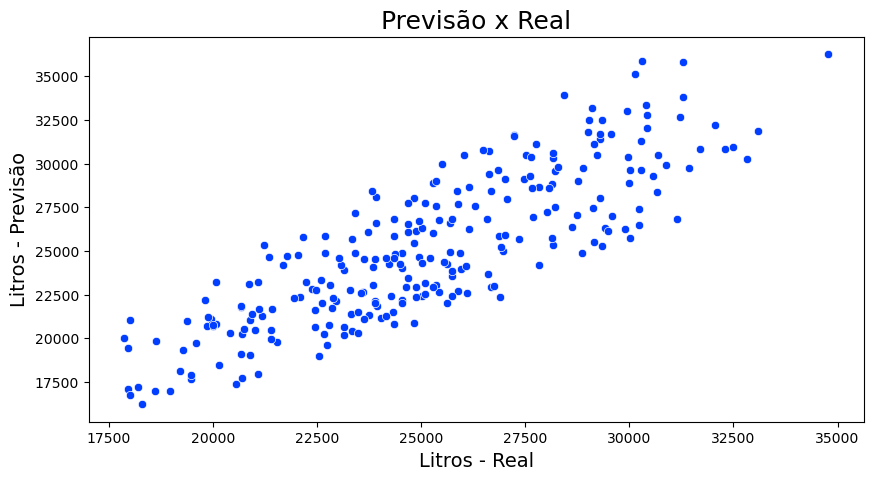

In [115]:
ax = sns.scatterplot(x=y_pred_treino, y=y_treino) # define os eixos do gráfico
ax.figure.set_size_inches(10, 5) # define o tamanho da figura
ax.set_title('Previsão x Real', fontsize=18) # define o título do gráfico
ax.set_ylabel('Litros - Previsão', fontsize=14) # define o label do eixo y
ax.set_xlabel('Litros - Real', fontsize=14) # define o label do eixo x
ax

Obtendo os resíduos

In [116]:
residuo = y_treino - y_pred_treino # calcula o resíduo
residuo

268    2801.916994
231   -1824.664072
157    1277.699138
19     4998.770364
147    2895.748882
          ...     
71    -2871.339016
106    -852.621893
270   -2975.608727
348     538.234756
102    -931.566523
Name: consumo_litros, Length: 255, dtype: float64

**Gráfico de dispersão entre as variáveis estimadas e os resíduos**

Variabilidade Constante: Em um modelo de regressão, estamos tentando modelar a relação entre uma variável independente (ou preditora) e uma variável dependente (ou resposta). A homocedasticidade implica que a variabilidade dos erros (diferença entre os valores observados e os valores previstos pelo modelo) seja aproximadamente constante em todos os níveis da variável preditora.

Gráfico de Resíduos: Uma maneira comum de verificar a homocedasticidade é criar um gráfico de resíduos. Os resíduos são as diferenças entre os valores observados e os valores previstos pelo modelo de regressão. Se a variabilidade dos resíduos for constante em relação aos valores previstos, o gráfico de resíduos terá uma aparência uniforme e aleatória ao longo de toda a faixa dos valores previstos.

**ao ajustar modelos de regressão, é sempre aconselhável verificar se a suposição de homocedasticidade é atendida por meio de gráficos de resíduos e outras técnicas de diagnóstico.**

<Axes: title={'center': 'Resíduo x Previsão'}, xlabel='Consumo - Previsão', ylabel='Resíduo'>

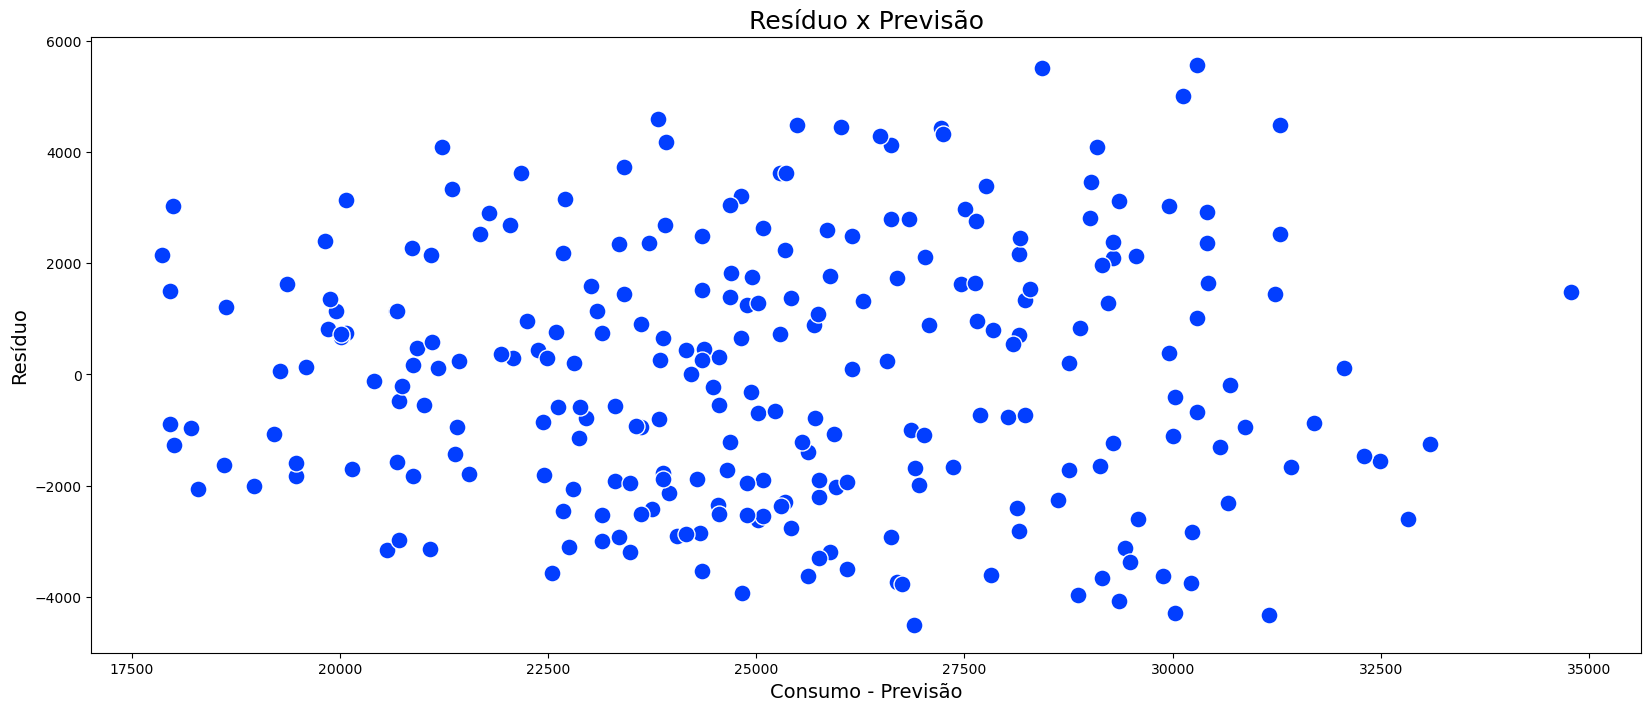

In [119]:
ax = sns.scatterplot(x=y_pred_treino, y=residuo, s=150) # define os eixos do gráfico
ax.figure.set_size_inches(20, 8) # define o tamanho da figura
ax.set_title('Resíduo x Previsão', fontsize=18) # define o título do gráfico
ax.set_ylabel('Resíduo', fontsize=14) # define o label do eixo y
ax.set_xlabel('Consumo - Previsão', fontsize=14) # define o label do eixo x
ax

Os resíduos ao quadrado são frequentemente usados para detectar a presença de **heterocedasticidade** em um modelo de regressão e para verificar se a suposição de homocedasticidade foi violada.

Variação Não Constante: Em um cenário de heterocedasticidade, a variabilidade dos erros tende a aumentar ou diminuir à medida que os valores previstos pelo modelo de regressão mudam. Isso pode ser visualizado em um gráfico de resíduos, onde os pontos tendem a se espalhar mais amplamente em algumas partes da faixa dos valores previstos e se contraem em outras.

https://www.bing.com/images/search?q=heterocedasticidade

<Axes: title={'center': 'Resíduo x Previsão'}, xlabel='Consumo - Previsão', ylabel='Resíduo ao quadrado'>

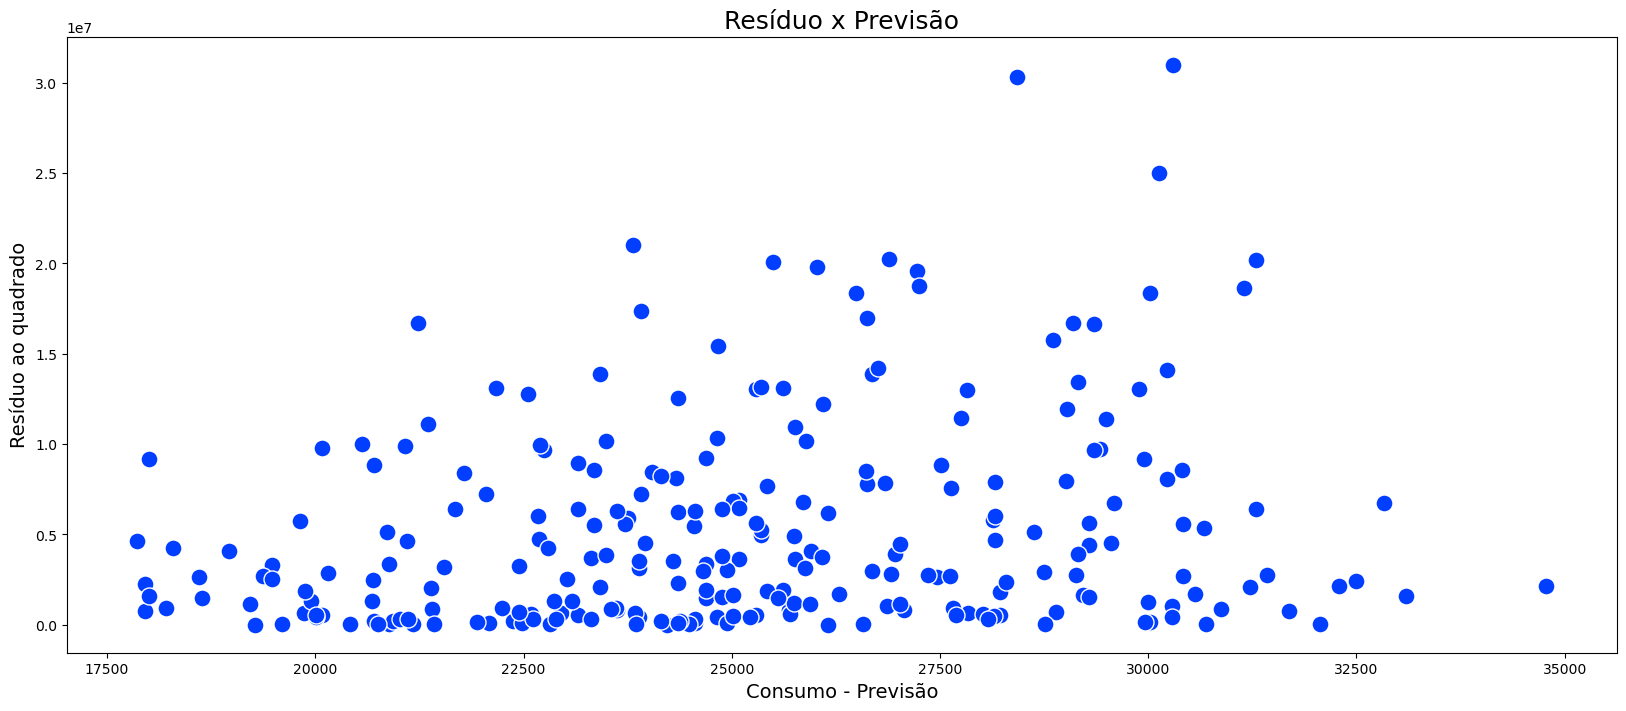

In [121]:
ax = sns.scatterplot(x=y_pred_treino, y=residuo**2, s=150) # residuo**2 = residuo ao quadrado
ax.figure.set_size_inches(20, 8) # define o tamanho da figura
ax.set_title('Resíduo x Previsão', fontsize=18) # define o título do gráfico
ax.set_ylabel('Resíduo ao quadrado', fontsize=14) # define o label do eixo y
ax.set_xlabel('Consumo - Previsão', fontsize=14) # define o label do eixo x
ax

Distribuição de frequências dos resíduos

<Axes: title={'center': 'Distribuição de Frequências - Resíduos'}, xlabel='Litros', ylabel='Count'>

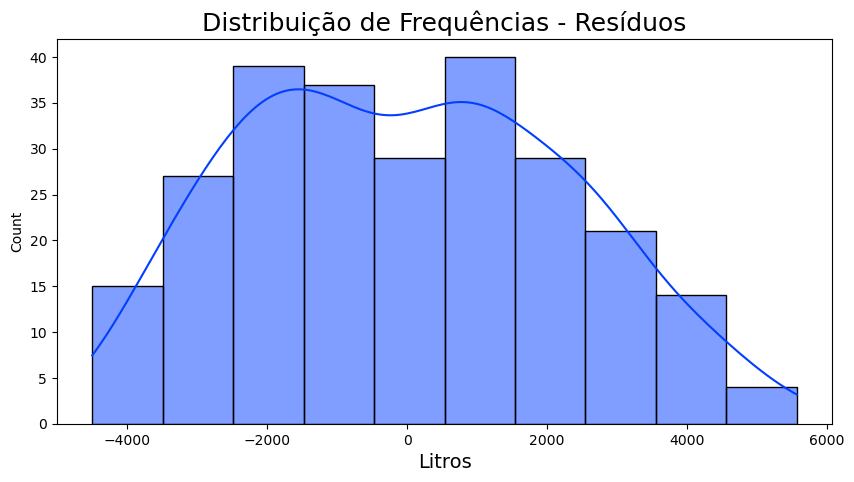

In [127]:
ax = sns.histplot(residuo,kde=True) # define os eixos do gráfico
ax.figure.set_size_inches(10, 5) # define o tamanho da figura
ax.set_title('Distribuição de Frequências - Resíduos', fontsize=18) # define o título do gráfico
ax.set_xlabel('Litros', fontsize=14) # define o label do eixo x
ax